In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
df=pd.read_csv("/kaggle/input/cardiovascular-disease/cardio_data_processed.csv")

In [3]:
#show first few rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [4]:
#remove two columns 'age in days' and 'bp_category_encoded'
df=df.drop(columns=['bp_category_encoded'],axis=1)

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [6]:
#no of rows and columns in df
df.shape

(68205, 16)

In [7]:
#check name and datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68205 non-null  int64  
 1   age          68205 non-null  int64  
 2   gender       68205 non-null  int64  
 3   height       68205 non-null  int64  
 4   weight       68205 non-null  float64
 5   ap_hi        68205 non-null  int64  
 6   ap_lo        68205 non-null  int64  
 7   cholesterol  68205 non-null  int64  
 8   gluc         68205 non-null  int64  
 9   smoke        68205 non-null  int64  
 10  alco         68205 non-null  int64  
 11  active       68205 non-null  int64  
 12  cardio       68205 non-null  int64  
 13  age_years    68205 non-null  int64  
 14  bmi          68205 non-null  float64
 15  bp_category  68205 non-null  object 
dtypes: float64(2), int64(13), object(1)
memory usage: 8.3+ MB


In [8]:
#perform basic calculations in numeric columns
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [9]:
#check missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

Text(0.5, 0, '1: Female, 2: Male')

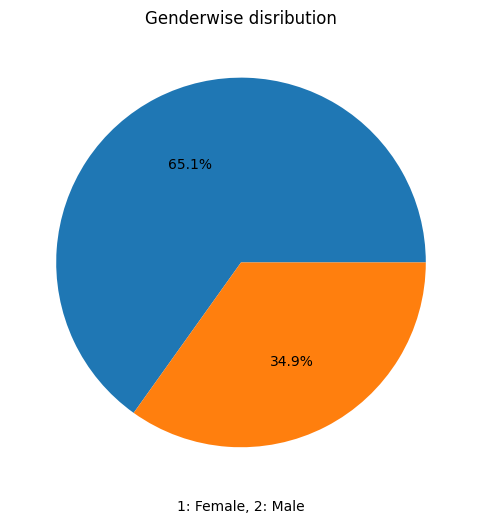

In [10]:
#plotting a bar graph of Genderwise disribution
plt.figure(figsize=(10,6))
plt.pie(df['gender'].value_counts(),autopct='%1.1f%%')
plt.title("Genderwise disribution")
plt.xlabel('1: Female, 2: Male')

Text(0.5, 0, '0: Non-smoker,1: Smoker')

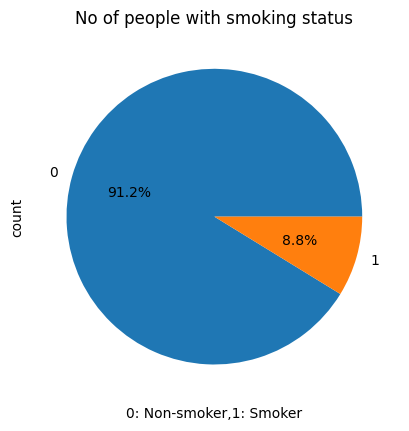

In [11]:
#plotting a bar graph of No of people with smoking status
df['smoke'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with smoking status")
plt.xlabel('0: Non-smoker,1: Smoker')

Text(0.5, 0, '0: Does not consume alcohol, 1: Consumes alcohol')

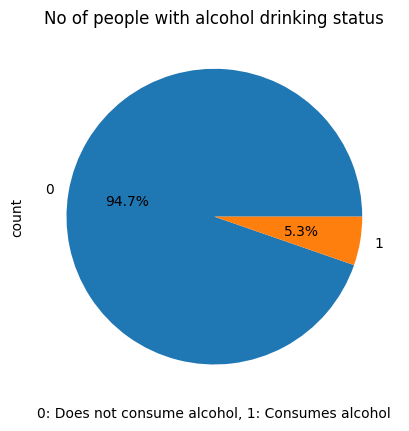

In [12]:
#plotting a bar graph of No of people with smoking status
df['alco'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with alcohol drinking status")
plt.xlabel('0: Does not consume alcohol, 1: Consumes alcohol')

Text(0.5, 1.0, 'No of people in each B.P Category')

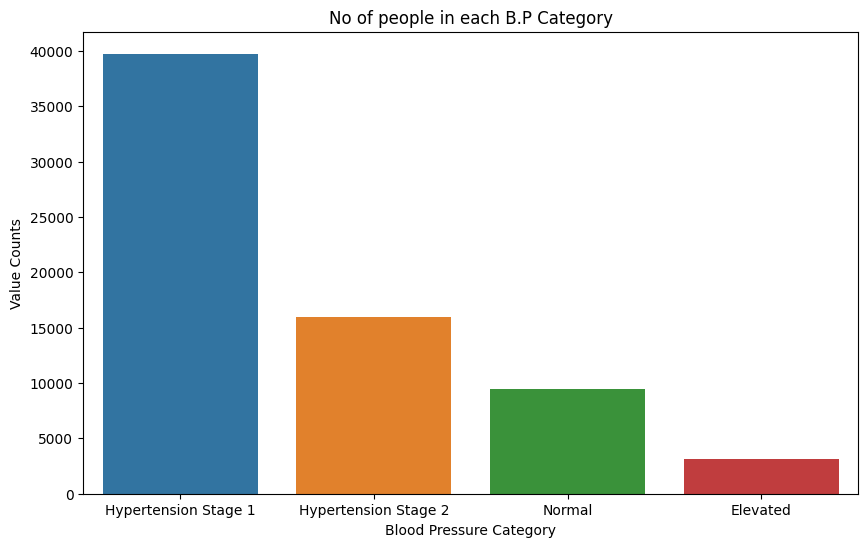

In [13]:
#plotting a bar graph of No of people in B.P Categories
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bp_category')
plt.xlabel("Blood Pressure Category")
plt.ylabel("Value Counts")
plt.title("No of people in each B.P Category")

Text(0.5, 0, 'Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

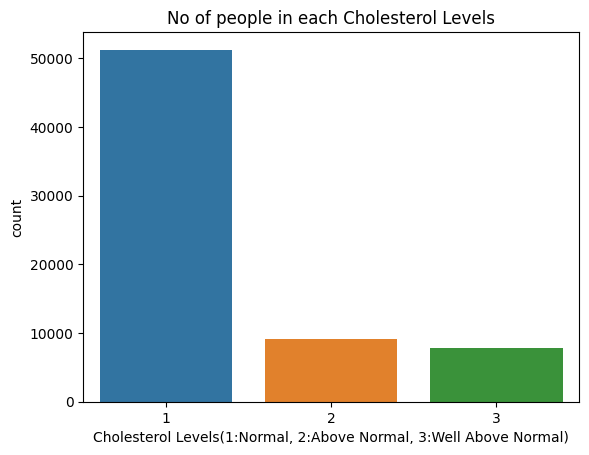

In [14]:
#plotting a bar graph of No of people with Cholesterol Levels
sns.countplot(data=df, x='cholesterol')
plt.title("No of people in each Cholesterol Levels")
plt.xlabel('Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

Text(0.5, 0, 'Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

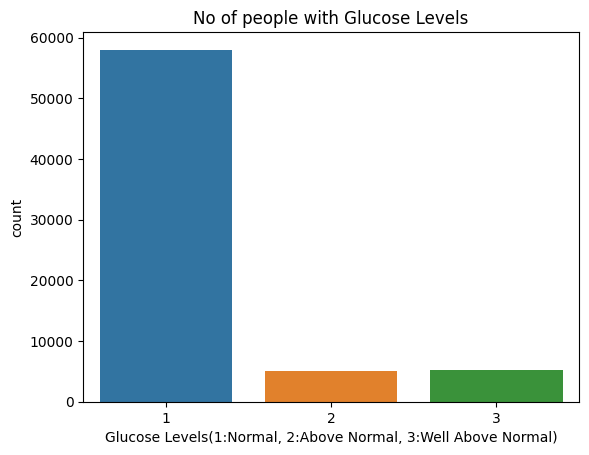

In [15]:
#plotting a bar graph of No of people with Glucose Levels
sns.countplot(data=df, x='gluc')
plt.title("No of people with Glucose Levels")
plt.xlabel('Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

Text(0.5, 0, '0: Not physically active, 1: Physically active')

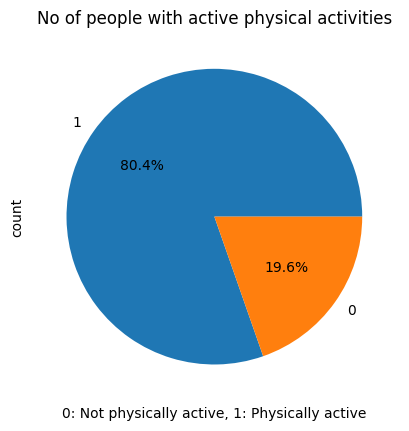

In [16]:
#plotting a bar graph of No of people with smoking status
# 0:Not physically active, 1:Physically active
df['active'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with active physical activities")
plt.xlabel('0: Not physically active, 1: Physically active')

Text(0.5, 0, '0: Absence, 1: Presence')

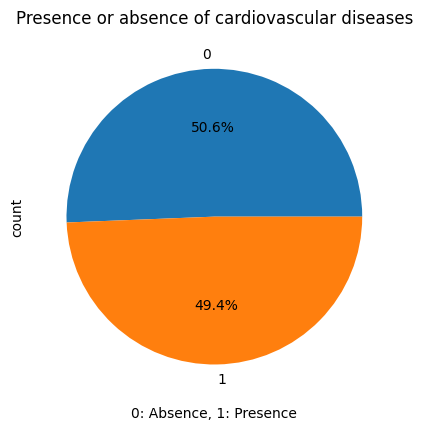

In [17]:
#plotting a bar graph of No of people with smoking status
# 0:Not physically active, 1:Physically active
df['cardio'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Presence or absence of cardiovascular diseases")
plt.xlabel('0: Absence, 1: Presence')

# Ordinal Encoding
Ordinal encoding is used to convert categorical data with ordered relationships into numerical values. 

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
OE=OrdinalEncoder(categories=[['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']])

In [20]:
OE.fit(df[['bp_category']])

OrdinalEncoder(categories=[['Normal', 'Elevated', 'Hypertension Stage 1',
                            'Hypertension Stage 2']])

In [21]:
df['bp_encoded']=OE.transform(df[['bp_category']])

In [22]:
df=df.drop(columns='bp_category',axis=1)

In [23]:
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_encoded
28144,41283,21239,1,164,62.0,120,80,1,1,0,0,1,1,58,23.051755,2.0
15424,22596,21720,1,158,85.0,170,100,3,2,0,0,0,1,59,34.049031,3.0
14562,21348,15147,1,165,67.0,120,80,1,1,0,0,0,0,41,24.609734,2.0
19238,28189,19563,2,177,74.0,120,80,1,1,1,1,1,0,53,23.620288,2.0
19312,28298,19681,1,165,78.0,145,95,1,1,0,0,1,1,53,28.650138,3.0
13877,20324,16098,1,165,80.0,120,80,1,1,0,0,0,1,44,29.384757,2.0
37142,54408,21846,1,168,75.0,165,90,2,1,0,0,0,1,59,26.573129,3.0
9483,13884,16792,2,158,69.0,120,80,1,1,0,0,1,0,46,27.639801,2.0
26114,38305,23254,1,147,68.0,140,80,2,1,0,0,0,0,63,31.468370,2.0
63697,93327,20236,1,158,62.0,120,80,1,1,0,0,1,0,55,24.835763,2.0


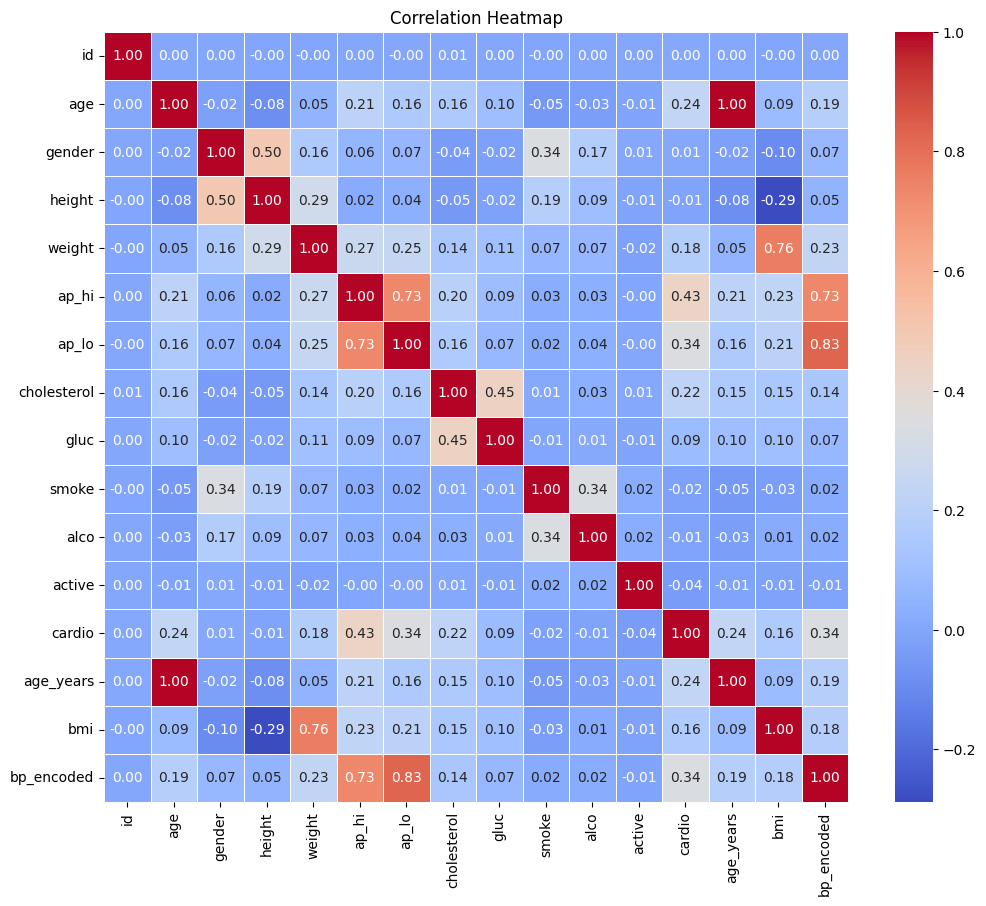

In [24]:
#creating a heat map
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# seperate the feature variables & target variable
x=df.drop(columns='cardio',axis=1)
y=df['cardio']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Standardization
This process scales each feature such that it has a mean of 0 and a standard deviation of 1

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
#created an instance of the "StandardScaler" class called "SS"
SS=StandardScaler()

In [30]:
#fitted SS on the training dataset
SS.fit(x_train)

StandardScaler()

In [31]:
#transformed both training and test datasets
x_train_transformed=SS.transform(x_train)
x_test_transformed=SS.transform(x_test)

# Logistic Regression
It is a machine learning algorithm used for binary classification problems, where the goal is to predict one of two possible outcomes (usually represented as 0 and 1). 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
#created an instance of the "LogisticRegression" class called "LR"
LR=LogisticRegression()

In [34]:
#Training the model
LR.fit(x_train_transformed,y_train)

LogisticRegression()

In [35]:
#made predictions on test dataset
y_pred=LR.predict(x_test_transformed)

In [36]:
#calculated the accuracy of the model
accuracy_score(y_pred,y_test)

0.7324976174767246